# **REGRESIÓN LINEAL SIMPLE**
Un poco de teoría antes de empezar \

Wikipedia:
  

  

*   [Regresión lineal](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal#Regresi%C3%B3n_lineal_simple)
*   [Simple Linear Regression](https://en.m.wikipedia.org/wiki/Simple_linear_regression)


Youtube:


*   [Dot CSV](https://www.youtube.com/watch?v=k964_uNn3l0)





In [2]:
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/k964_uNn3l0", width=800, height=400)

#**RESUMEN**

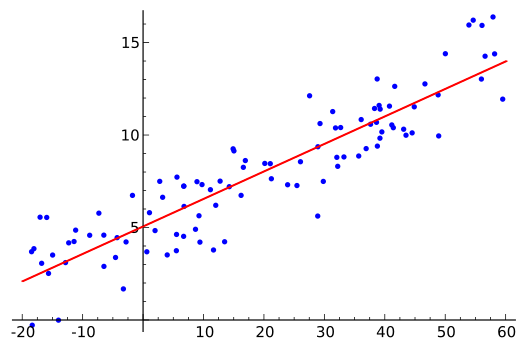

Hallar la Ecuación de la recta que mejor se ajusta a la nube de puntos $ \{ x_i , y_i \} $

\\
$$  \Large{ y = mx + b} $$


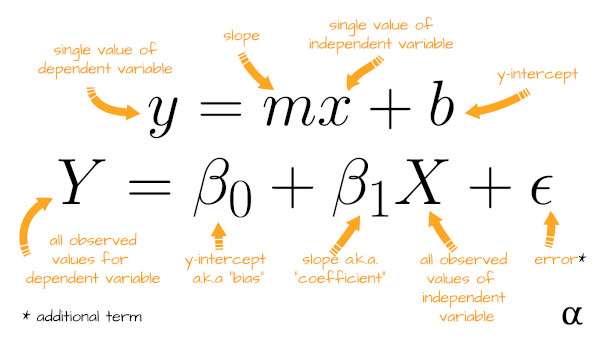

Tratamos de minimizar la funcion de error $S(\beta_0 , \beta_1)$\
$$ S(\beta_0 , \beta_1) = \sum\limits_{i=1}^n (y_i - y)^2 $$
$$ S(\beta_0 , \beta_1) = \sum\limits_{i=1}^n (y_i - \beta_0 - \beta_1x_i)^2 $$
$$ S(b , m) = \sum\limits_{i=1}^n (y_i - b - mx_i)^2 $$

El error cuadrático medio(MSE) sera:\
$$ {1 \over n} \sum\limits_{i=1}^n (y_i - b - mx_i)^2 $$

Cálculo de  **( m , b )** para **y = mx + b**  por ajuste del mínimo Error Cuadrático Medio (MSE).\
Se obtiene derivando con respecto a **b** y **m** en la función $S(b,m)$.
$$ \\ $$
$$m = {{ ∑ x ∑ y - n ∑ xy  } \over {(∑ x)^2 - n ∑ x^2}}   $$
$$ \\ $$
$$ b = \bar{y}  - m\bar{x} $$

Coeficiente de correlación R entre X , Y: [Pearson correlation coefficient](https://en.m.wikipedia.org/wiki/Pearson_correlation_coefficient)


*   R = 0 ( no existe relación entre X e Y)
*   R = 1 ( perfecta relación lineal entre X e Y)
*   R = -1 ( perfecta relación lineal inversa entre X e Y)
 
$$  R ={ {σ_{xy}} \over {σ_x σ_y } } $$

$$ \\ \\ $$

$$ Covarianza (xy) = σ_{xy} ={ \sum xy \over n  }- \bar x \bar y $$

$$ \\ \\ $$

$$ Desviación Típica(x) = σ_{x} = \sqrt{{ \sum x^2 \over n  }- \bar x^2} $$

$$ \\ \\ $$

$$ Desviación Típica(y) = σ_{y} = \sqrt{{ \sum y^2 \over n  }- \bar y^2} $$



# **EJEMPLO PRÁCTICO DE REGRESIÓN LINEAL SIMPLE**

**Hallar la relación entre la altura de una presona (x) y su peso (y).**\
Datos medidos:


<font color='#ff0000'><b>LIBRERÍAS PYTHON</b></font>



In [3]:
# IMPORTAMOS LIBRERÍAS
import numpy as np
import matplotlib.pyplot as plt


CONFIGURAR COLAB

In [4]:
# CONFIGURAR VISUALIZACIONES EN COLAB-JUPYTER
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

LOS DATOS - NUBE DE PUNTOS

In [5]:
# Listas con los datos

# ALTURAS cm ( estudio sobre 14 personas)
x = [145,150,155,160,165,170,175,180,185,190,195,200,205,210]

# PESOS kg
y = [41, 43, 49, 51, 55, 56, 60, 66, 69, 75, 78, 79, 83, 89]

# Ver tipo de datos

print(type(x))
print(x)
print(type(y))
print(y)
print(type(x[0]))

<class 'list'>
[145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210]
<class 'list'>
[41, 43, 49, 51, 55, 56, 60, 66, 69, 75, 78, 79, 83, 89]
<class 'int'>


In [6]:
# Conversión de python Listas a NUMPY ARRAYS

x = np.array(x)
y = np.array(y)

# Ver tipo de datos

print(type(x))
print(x)
print(type(y))
print(y)
print(type(x[0]))


<class 'numpy.ndarray'>
[145 150 155 160 165 170 175 180 185 190 195 200 205 210]
<class 'numpy.ndarray'>
[41 43 49 51 55 56 60 66 69 75 78 79 83 89]
<class 'numpy.int64'>


VISUALIZAMOS LOS DATOS

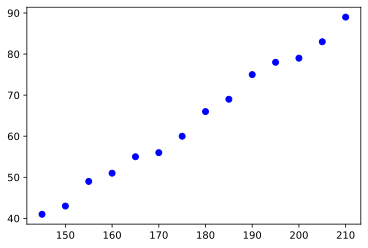

In [7]:
plt.scatter(x, y, color = '#0000ff')
plt.show()

CALCULEMOS ALGUNOS PARAMETROS PARA COMPLETAR LAS FÓRMULAS

In [8]:
n = len(x)
sumx = sum(x)
sumy = sum(y) 
sumx2 = sum(x**2)
sumy2 = sum(y**2) 
sumxy = sum(x*y)

#promx =  sumx/n
promx = np.mean(x)
#promy =  sumy/n
promy = np.mean(y)

#sigmax = np.sqrt(sumx2/n - promx**2)
sigmax = np.std(x)
#sigmay = np.sqrt(sumy2/n - promy**2)
sigmay = np.std(y)

sigmaxy = sumxy/n - promx * promy
'''
sigmaxy = np.cov(x,y)  
#np.cov(x,y) calcula para (n-1) y no para (n)
#np.cov(x,y)  devolvería una matriz [[covxx , covxy],[covxy,covyy]]
#el valor de la covxy o sigmaxy   sería 
sigmaxy = np.cov(x,y)[0][1]
#para corregir (n-1)    
sigmaxy = sigmaxy * (n-1)/n
'''

print(sigmaxy )

297.8571428571431


VEAMOS CUANTO SE PARECE NUESTROS DATOS A UNA RECTA\
Coeficiente de correlación R 


In [9]:
r = sigmaxy / (sigmax * sigmay)
print(r)

0.9960454692942906


YA PODEMOS CALCULAR m , b
$$m = {{ ∑ x ∑ y - n ∑ xy  } \over {(∑ x)^2 - n ∑ x^2}}   $$
$$ \\ $$
$$ b = \bar{y}  - m\bar{x} $$

In [10]:
m = (sumx * sumy - n * sumxy)/(sumx**2 - n * sumx2)
b = promy - m * promx
print('pendiente=',m,'   sesgo=',b)

pendiente= 0.7331868131868132    sesgo= -66.28351648351648


VISUALIZAMOS EL RESULTADO

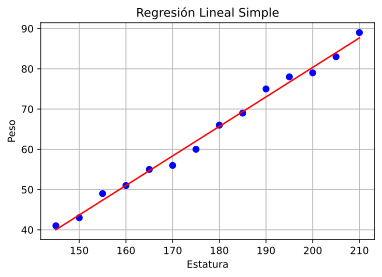

In [11]:
plt.plot(x, y, 'o', color = '#0000ff')
plt.plot(x,m*x + b, color = '#ff0000')
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.title("Regresión Lineal Simple")
plt.grid()
plt.show()

FUNCIÓN DE ERROR   (MSE)

In [14]:
# Diferencia entre valores medidos y valores devueltos por a ecución de la recta

S = 0
for i in range(len(x)):
  S += (y[i] - (x[i]*m+b) )**2

MSE = S/n 
print(MSE)
print(np.sqrt(MSE))

1.7375196232339092
1.318150076142284


**¿CUANTO PESARÁ UNA PERSONA QUE MIDE  191cm?**